In [ ]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [ ]:
SEED = 42

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data_size = 7366
data = pd.read_csv(f"../data/processed_data/clean_data_{data_size}.csv")

In [ ]:
data.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["city", "state", "price", "price_cat"]),
    data["price_cat"],
    test_size=0.2,
    random_state=SEED,
)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    LogisticRegression(),
    SVC(),
    XGBClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
]

params = {
    type(LogisticRegression()).__name__: {
        "penalty": ["l1", "l2"],
        "C": [0.1, 1, 10],
        "solver": ["liblinear"],
    },
    type(SVC()).__name__: {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "degree": [2, 3, 4],
        "C": [0.1, 1],
    },
    type(XGBClassifier()).__name__: {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5, 6, 7],
        "learning_rate": [0.01, 0.05, 0.1],
        "gamma": [0, 0.25, 1.0],
    },
    type(MLPClassifier()).__name__: {
        "hidden_layer_sizes": [(5, 3), (14, 7, 3), (140, 140, 140)],
        "activation": ["relu"],
        "early_stopping": [True],
    },
    type(RandomForestClassifier()).__name__: {
        "n_estimators": [10, 50, 100, 200],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
    },
    type(KNeighborsClassifier()).__name__: {
        "n_neighbors": [3, 5, 10],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree"],
    },
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm

# Perform cross-validation for each model
for model in tqdm(models, desc="Training"):
    print("Training %s\n" % type(model).__name__)
    model_name = type(model).__name__
    model_params = params[model_name]

    # Create GridSearchCV instance
    grid_search = GridSearchCV(estimator=model, param_grid=model_params, cv=5)

    # Fit the model and perform cross-validation
    grid_search.fit(X_train, y_train)

    # Get the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Calculate predictions
    y_pred = grid_search.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best score for {model_name}: {best_score}")
    print(f"Accuracy for {model_name}: {accuracy}")

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


def classifier_metrics(model, X_train, y_train, X_test, y_test):
    # fit model to training data
    model.fit(X_train, y_train)

    # get predicted y values for train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate accuracy scores for train and test data
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # calculate confusion matrices for train and test data
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # plot confusion matrices
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    sns.heatmap(train_cm, ax=axs[0], annot=True, cmap="Blues", fmt="g")
    axs[0].set_title("Train Confusion Matrix")
    axs[0].set_xlabel("Predicted Labels")
    axs[0].set_ylabel("True Labels")
    sns.heatmap(test_cm, ax=axs[1], annot=True, cmap="Blues", fmt="g")
    axs[1].set_title("Test Confusion Matrix")
    axs[1].set_xlabel("Predicted Labels")
    axs[1].set_ylabel("True Labels")
    plt.show()

    # print train and test accuracy
    print("Train Accuracy:", round(train_acc, 3))
    print("Test Accuracy:", round(test_acc, 3))

### Logistic regression

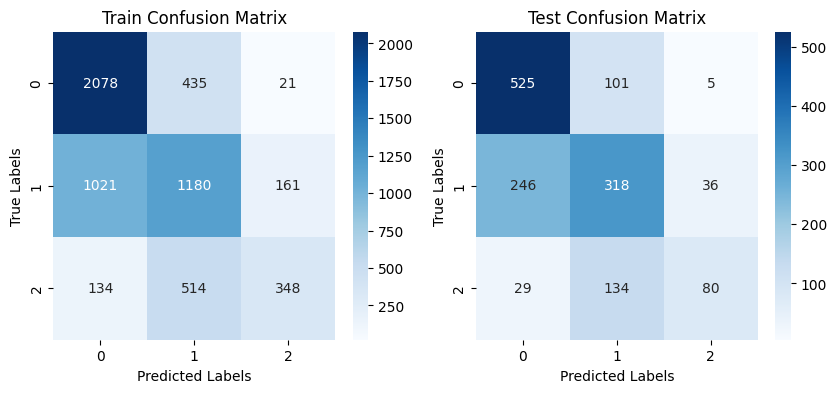

Train Accuracy: 0.612
Test Accuracy: 0.626


In [13]:
params = {"C": 0.1, "penalty": "l1", "solver": "liblinear"}
model = LogisticRegression(**params)
model.fit(X_train, y_train)
classifier_metrics(model, X_train, y_train, X_test, y_test)

### MLP Classifier

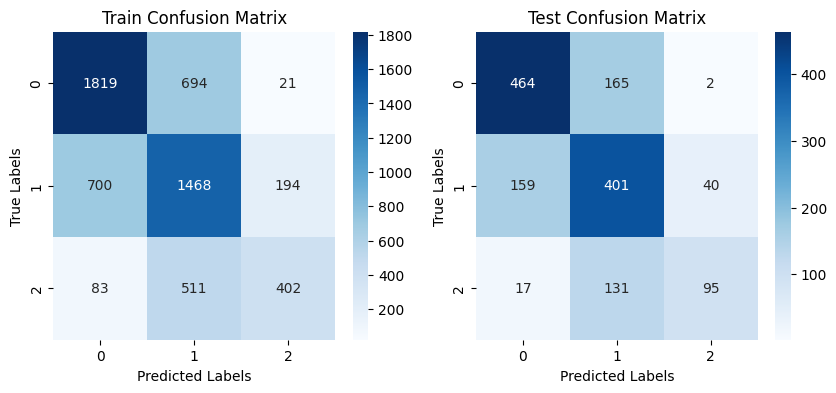

Train Accuracy: 0.626
Test Accuracy: 0.651


In [14]:
params = {
    "activation": "relu",
    "early_stopping": True,
    "hidden_layer_sizes": (140, 140, 140),
}
model = MLPClassifier(**params)
model.fit(X_train, y_train)
classifier_metrics(model, X_train, y_train, X_test, y_test)

#### Random Forest Classifier

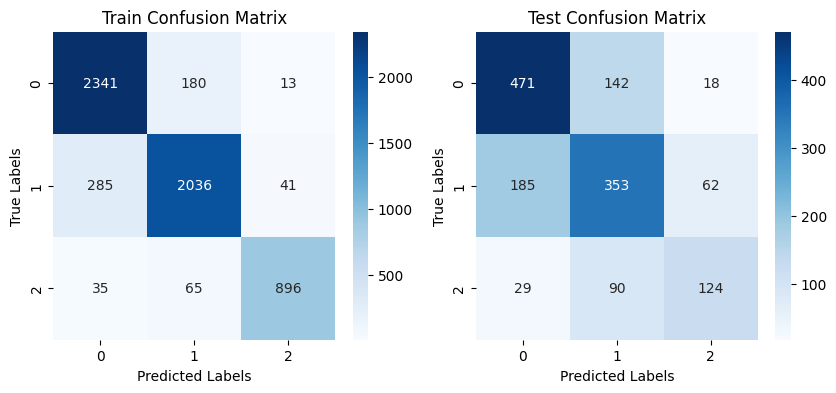

Train Accuracy: 0.895
Test Accuracy: 0.643


In [18]:
params = {}
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)
classifier_metrics(model, X_train, y_train, X_test, y_test)

#### KNN Classifier

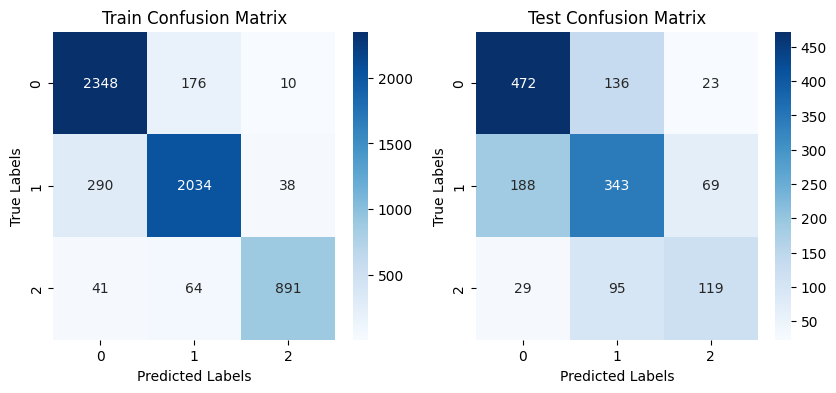

Train Accuracy: 0.895
Test Accuracy: 0.634


In [20]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
classifier_metrics(model, X_train, y_train, X_test, y_test)

#### Logistic Regression 

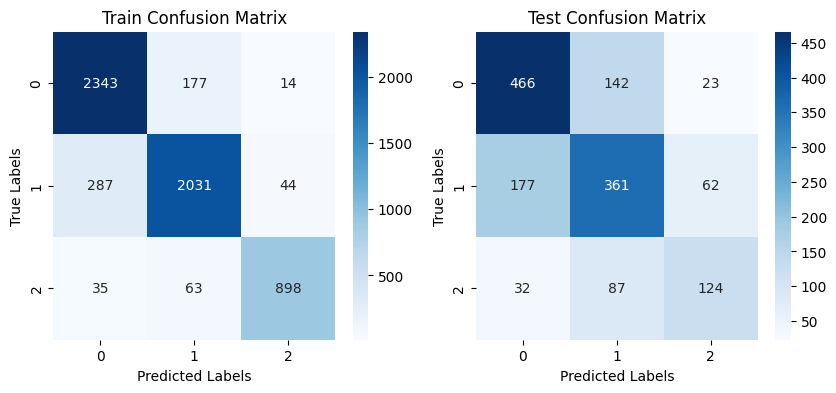

Train Accuracy: 0.895
Test Accuracy: 0.645


In [24]:
# Do a regression logist models for 3 labels
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
classifier_metrics(model, X_train, y_train, X_test, y_test)